## PS1-3 Poisson Regression

#### (a)

\begin{align*}
p(y; \ \lambda) & = \frac{e^{- \lambda} \ \lambda^y}{y \ !} \\
                & = \frac{1}{y \ !} \exp (y \log \lambda - \lambda) \\
                & = b(y) \exp(\eta^T T(y) - a(\eta))
\end{align*}

where $b(y) = \frac{1}{y \ !}$, $T(y) = y$, $\eta = \log \lambda$ and $a(\eta) = \exp(\eta)$.

#### (b)

\begin{align*}
\mathbb{E} [T(y); \ \eta] & = \mathbb{E} [y; \ \eta] \\
                          & = \lambda \\
                          & = \exp (\eta)
\end{align*}

#### (c)

Recall the design choices of GLM:

1. $y \ \vert \ x; \ \theta \sim \mathrm{ExponentialFamily} (\eta)$

2. $h(x) = \mathbb{E} [y \ \vert \ x]$

3. $\eta = \theta^T x$

Plug them into $\ell$:

\begin{align*}
\ell (\theta) & = \log p(y^{(i)} \ \vert \ x^{(i)}; \ \theta) \\
              & = \log b(y^{(i)}) \exp (\eta^T T(y^{(i)}) - a(y^{(i)})) \\
              & = (x^{(i)})^T \theta y^{(i)} - \exp (\theta^T x^{(i)}) - \log y^{(i)} !
\end{align*}

By design choice 2 and 3:

\begin{align*}
h(x) & = \mathbb{E} [y \ \vert \ x] \\
     & = \lambda \\
     & = \exp (\eta) \\
     & = \exp (\theta^T x)
\end{align*}

Therefore,

\begin{align*}
\frac{\partial}{\partial \theta}\ell (\theta) & = x^{(i)} y^{(i)} - x^{(i)} \exp (\theta^T x^{(i)}) \\
                                              & = \big( y^{(i)} - h_\theta(x^{(i)}) \big) \ x^{(i)}
\end{align*}

The stochastic gradient ascent update rule is:

$$\theta := \theta + \alpha \ \big( y^{(i)} - h_\theta (x^{(i)}) \big) \ x^{(i)}$$

#### (d)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel

In [3]:
x_train, y_train = util.load_dataset('data/ds4_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds4_valid.csv', add_intercept=True)

Implement Poisson Regression:

In [9]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def h(self, theta, x):
        """Vectorized implementation of h.

        :param theta: Shape (n,).
        :param x:     Training example inputs. Shape (m, n).
        :return:      The hypothesis of Poisson Regression, given by h(x) = exp(theta^T x). Shape (m,).
        """
        return np.exp(x @ theta)

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        def next_step(theta):
            return self.step_size / m * x.T @ (y - self.h(theta, x))

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            theta = np.zeros(n)
        else:
            theta = self.theta

        # Update theta
        step = next_step(theta)
        while np.linalg.norm(step, 1) >= self.eps:
            print(step)
            theta += step
            step = next_step(theta)

        self.theta = theta

    def predict(self, x):
        """Make a prediction given inputs x.

        :param x: Inputs of shape (m, n).
        :return   Floating-point prediction for each input, shape (m,).
        """

        return self.h(self.theta, x)

Tune the learning rate and train the Poisson Regression model:

In [10]:
clf = PoissonRegression(step_size=2e-7)
clf.fit(x_train, y_train)

[0.70508621 0.28166147 0.42342475 0.46397399 0.55935578]
[0.7050854  0.28166126 0.42342414 0.46397354 0.55935532]
[0.70508097 0.28166026 0.42342071 0.46397094 0.55935262]
[0.70505597 0.28165524 0.42340073 0.46395532 0.55933635]
[0.70490863 0.28162884 0.42327978 0.46385828 0.55923503]
[0.70400737 0.28148529 0.42252208 0.46323644 0.55858558]
[0.69832164 0.28068038 0.41764126 0.45915205 0.55432487]
[0.66205981 0.27610284 0.38595697 0.43219024 0.52625336]
[0.45272528 0.25192257 0.2008027  0.27208929 0.35988033]
[-0.09601141  0.18251755 -0.27852896 -0.1550349  -0.0842599 ]
[0.21502555 0.19206606 0.02295948 0.08876455 0.16663366]
[-0.08162621  0.11658605 -0.19821226 -0.14151736 -0.07590558]
[0.16426802 0.13749738 0.02677064 0.05131619 0.12360467]
[-0.0707673   0.0573553  -0.12812261 -0.12987129 -0.0692696 ]
[0.12843312 0.09224288 0.03619024 0.02621351 0.09315426]
[-0.05696643  0.02161846 -0.07858489 -0.11548569 -0.05926048]
[0.10309167 0.06256102 0.04053065 0.00968008 0.07167527]
[-0.0429180

Plot the predictions on training set:

In [6]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

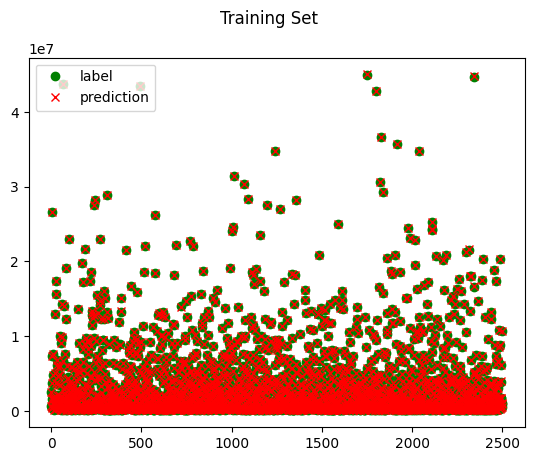

In [7]:
y_train_pred = clf.predict(x_train)
plot(y_train, y_train_pred, 'Training Set')

Plot the predictions on validation set:

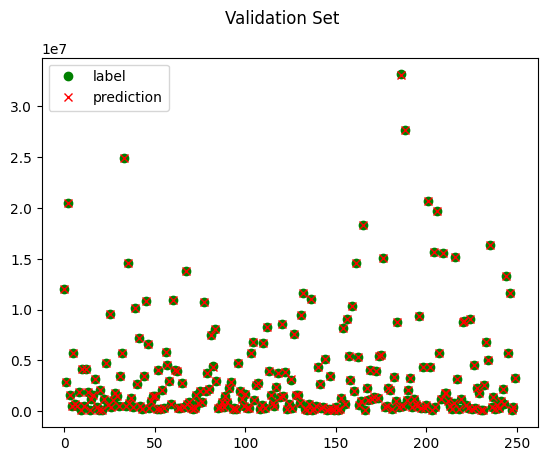

In [8]:
y_valid_pred = clf.predict(x_valid)
plot(y_valid, y_valid_pred, 'Validation Set')